# Core node’s personalized network

- How many core nodes are there in the Facebook network. What is the average degree of the core nodes?

In [10]:
library('igraph')
library('Matrix')
library('pracma')

In [11]:
rm(list=ls()) # clear workspace 
g <- read.graph("facebook_combined.txt", directed = FALSE)
V(g)$name = V(g)
#is.connected(g)
#plot(g, vertex.size=3, vertex.label=NA)
deg <- degree(g)
cout <- 0
avg <- 0
for (i in 1:length(deg)) {
    if (deg[i] > 200){
        cout <- cout + 1
        avg <- avg + deg[i]
    }
}
avg <- avg / cout
print(cout)
print(avg)


[1] 40
      1 
279.375 


- For each of the above core node’s personalized network, find the community structure using Fast-Greedy, Edge-Betweenness, and Infomap community detection algorithms. Compare the modularity scores of the algorithms. For visualization purpose, display the community structure of the core node’s personalized networks using colors. Nodes belonging to the same community should have the same color and nodes belonging to different communities should have different color. In this question, you should have 15 plots in total.

In [ ]:
g1 <-induced_subgraph(g,c(1,neighbors(g,1)), impl = "auto")
fc1 <- cluster_fast_greedy(g1)
modularity(fc1)
plot(fc1, g1, vertex.size=3, vertex.label=NA)

fc1 <- cluster_edge_betweenness(g1)
modularity(fc1)
plot(fc1, g1, vertex.size=3, vertex.label=NA)

fc1 <- cluster_infomap(g1)
modularity(fc1)
plot(fc1, g1, vertex.size=3, vertex.label=NA)


[1] 0.4131014

- For each of the core node’s personalized network(use same core nodes as question 9), remove the core node from the personalized network and find the community structure of the modified personalized network. Use the same community detection algorithm as question 9. Compare the modularity score of the community structure of the modi- fied personalized network with the modularity score of the community structure of the personalized network of question 9. For visualization purpose, display the community structure of the modified personalized network using colors. In this question, you should have 15 plots in total.


[1] 0.2456918

[1] 0.1505663

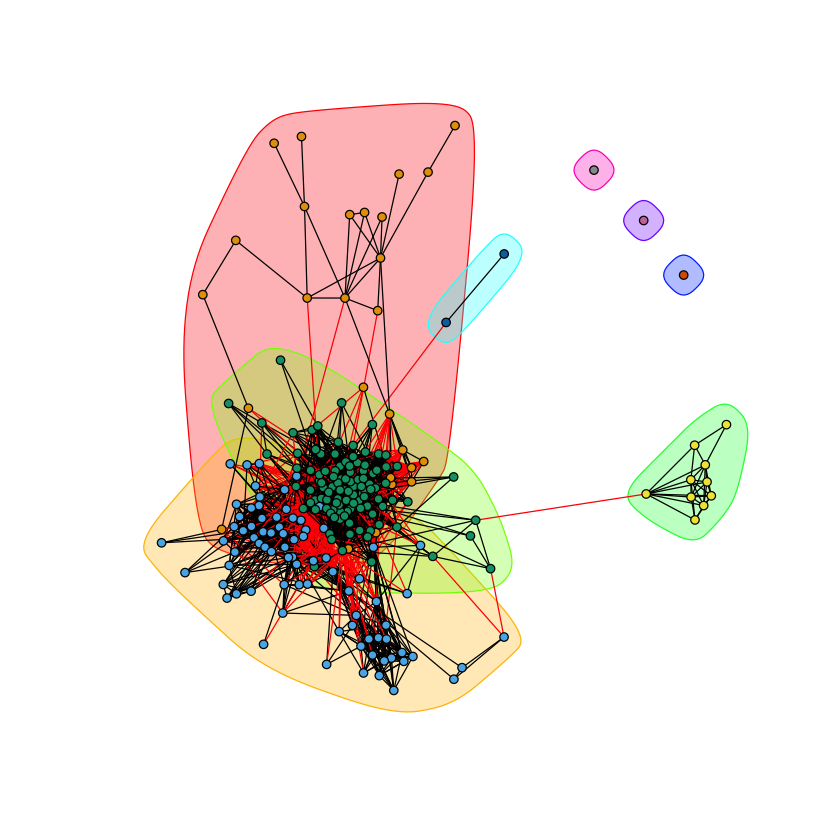

[1] 0.2465785

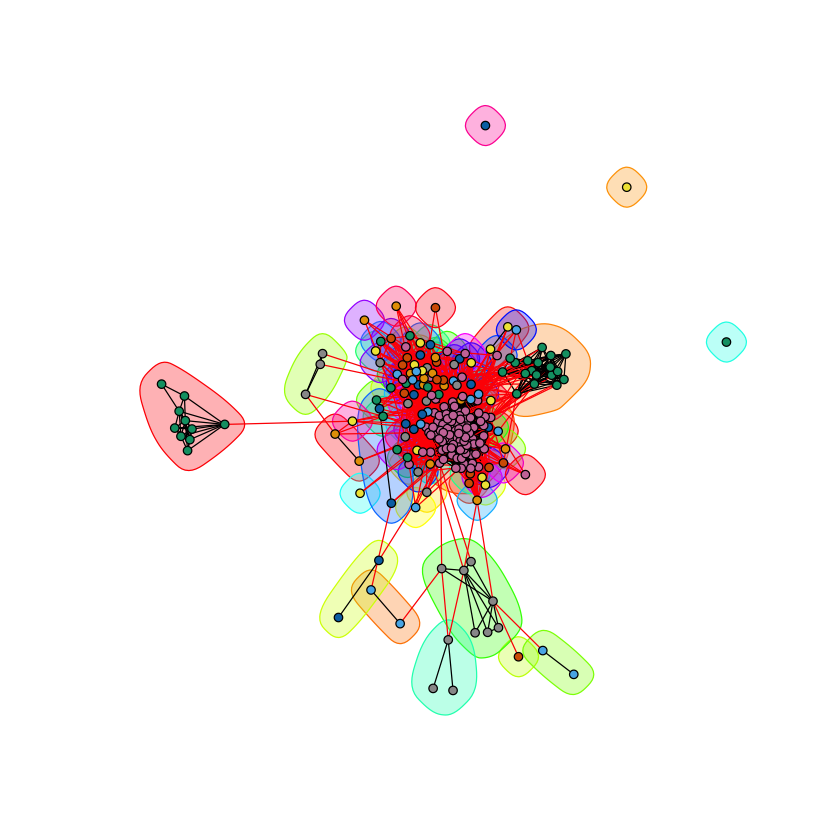

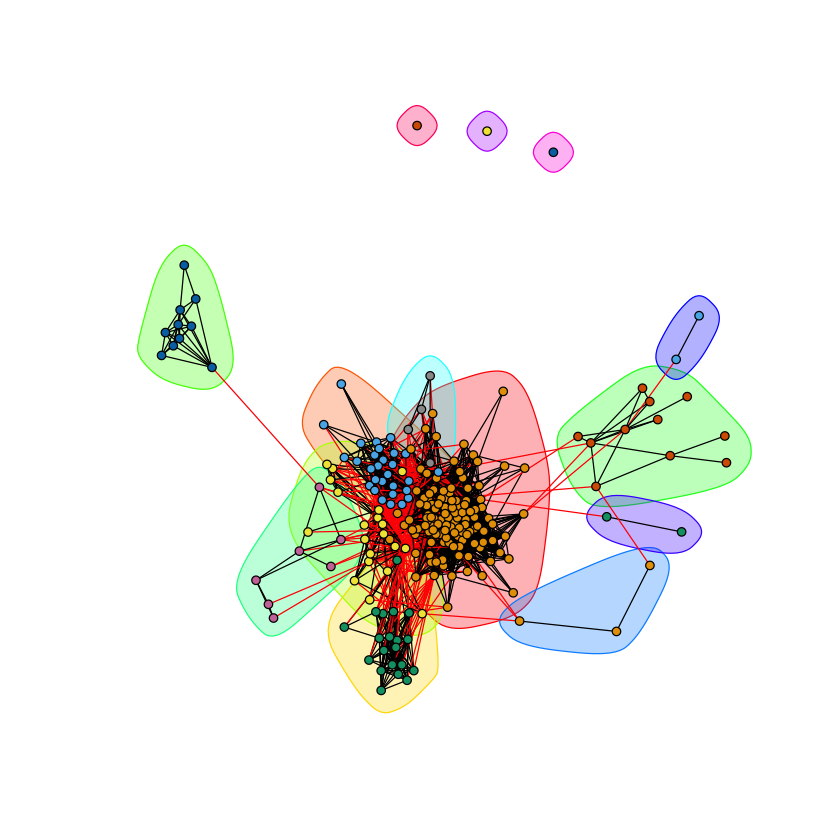

In [5]:
g1 <-induced_subgraph(g,neighbors(g,349), impl = "auto")
fc1 <- cluster_fast_greedy(g1)
modularity(fc1)
plot(fc1, g1, vertex.size=3, vertex.label=NA)

fc1 <- cluster_edge_betweenness(g1)
modularity(fc1)
plot(fc1, g1, vertex.size=3, vertex.label=NA)

fc1 <- cluster_infomap(g1)
modularity(fc1)
plot(fc1, g1, vertex.size=3, vertex.label=NA)

- For each of the core node’s personalized network, plot the distribution of embeddedness and dispersion. In this question, you will have 10 plots.


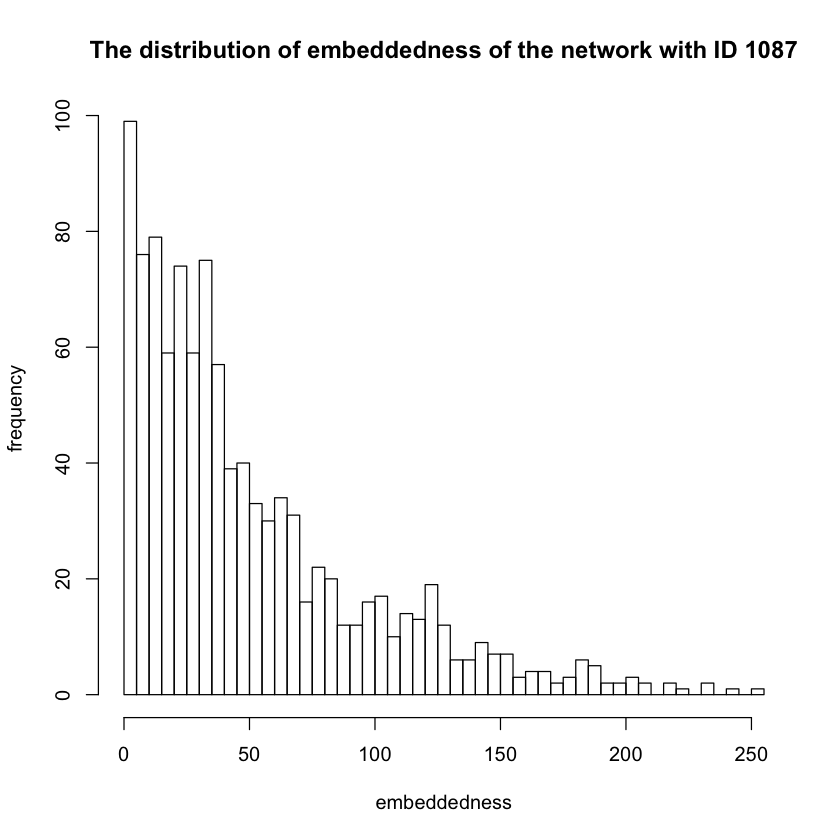

In [8]:
id <- 108
index <- neighbors(g,id)
g1 <- induced_subgraph(g,c(id,index), impl = "auto")
embed <- integer(length(V(g1)))
for(i in 1:length(index))
{
    embed[i] <- length(intersect(neighbors(g,id),neighbors(g,index[i])))
}
hist_embed <- hist(embed, breaks = 50,
     xlab = "embeddedness",ylab = "frequency",main="The distribution of embeddedness of the network with ID 1087")

disps <- integer(length(V(g1)))
for(i in 1:length(index))
{
    friend <- intersect(neighbors(g,id),neighbors(g,index[i]))
    subg <- delete.vertices(g1,c(which(V(g1)$name==id),which(V(g1)$name==index[i])))
    shortp <- 0
    for(j in 1:length(friend))
    {
        for(k in (j+1): length(friend))
        {
            shortp = c(shortp, shortest.paths(subg, which(V(subg)$name == friend[j]), which(V(subg)$name == friend[k])))
        }
    }
    disps[i] <- sum(shortp)
}
hist_disps <- hist(disps[which(disps!=Inf)], breaks = 100,
     xlab = "dispersion",ylab = "frequency",main="The distribution of dispersion of the network with ID 1087")

- For each of the core node’s personalized network, plot
5
the community structure of the personalized network using colors and highlight the node with maximum dispersion. Also, highlight the edges incident to this node. To detect the community structure, use Fast- Greedy algorithm. In this question, you will have 5 plots.

In [ ]:
id <- 1
index <- neighbors(g,id)
g1 <- induced_subgraph(g,c(id,index), impl = "auto")
embed <- integer(length(V(g1)))
for(i in 1:length(index))
{
    embed[i] <- length(intersect(neighbors(g,id),neighbors(g,index[i])))
}

disps <- integer(length(V(g1)))
for(i in 1:length(index))
{
    friend <- intersect(neighbors(g,id),neighbors(g,index[i]))
    subg <- delete.vertices(g1,c(which(V(g1)$name==id),which(V(g1)$name==index[i])))
    shortp <- 0
    for(j in 1:length(friend))
    {
        for(k in (j+1): length(friend))
        {
            shortp = c(shortp, shortest.paths(subg, which(V(subg)$name == friend[j]), which(V(subg)$name == friend[k])))
        }
    }
    disps[i] <- sum(shortp)
}

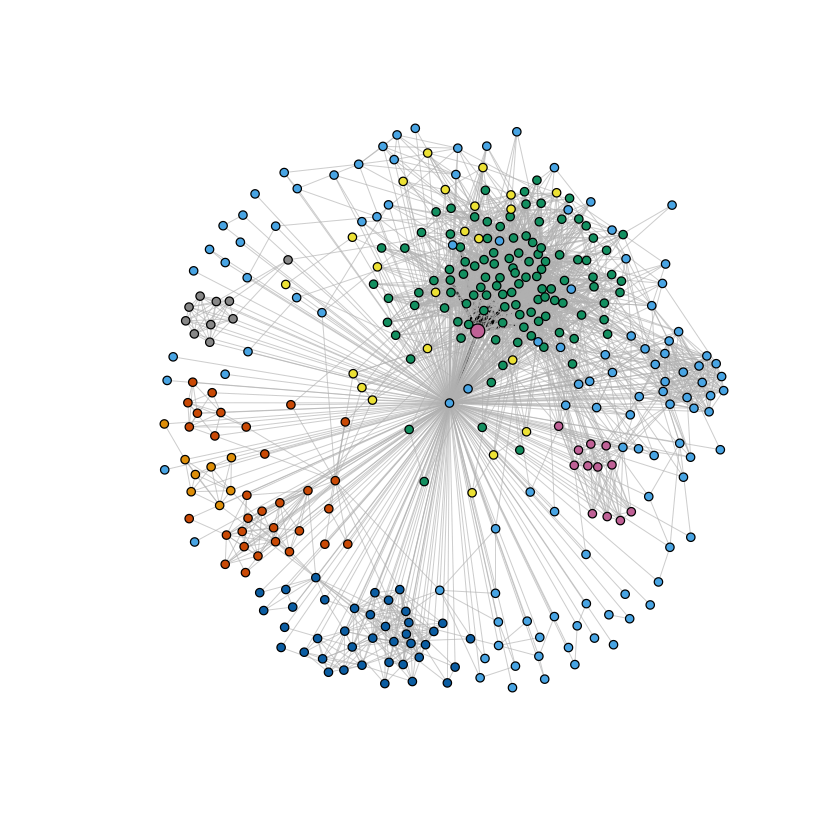

In [190]:
fc1 <- cluster_fast_greedy(g1)

ver_color <- fc1$membership + 1
ver_size = rep(3,length(ver_color))
edg_color <- rep("grey", length(E(g1)))
edg_wei = rep(0.5, length(E(g1)))
highl = which(V(g1)$name == V(g1)$name[which(disps == max(disps[which(disps!=Inf)]))])
ver_size[highl] = 5
ver_color[highl] = 7
edg_list = get.edgelist(g1, name = FALSE)
edg_color[which(edg_list[,1] == highl | edg_list[,2] == highl)] = "black";
edg_wei[which(edg_list[,1] == highl | edg_list[,2] == highl)] = "2.5";

plot(g1, vertex.size = ver_size, vertex.label = NA , edge.color =  edg_color, edge.width = edg_wei, vertex.color = ver_color)

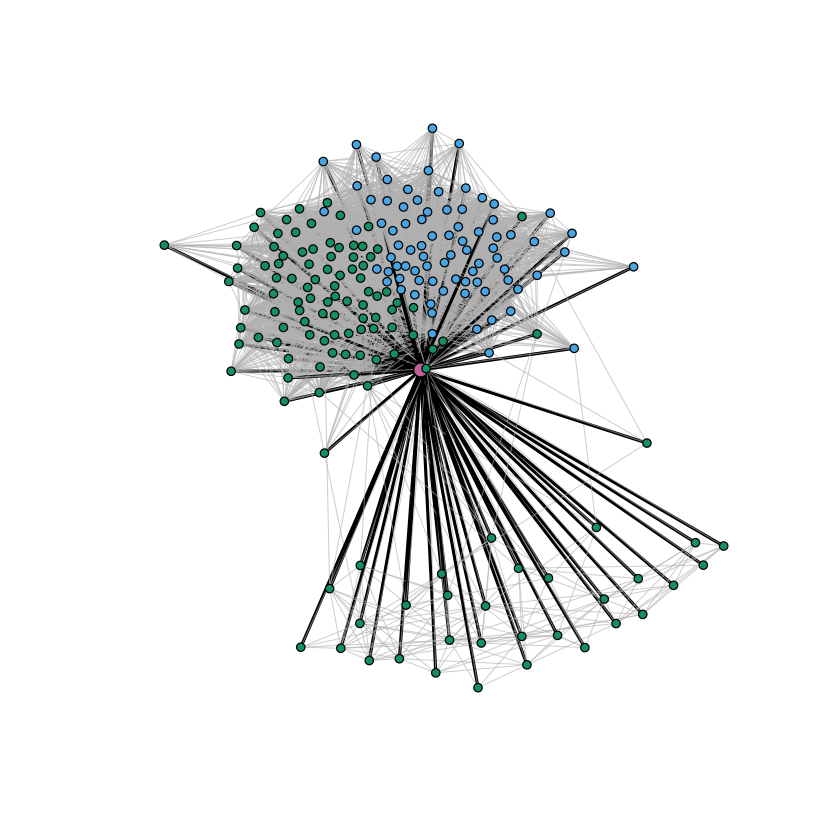

In [17]:
fc1 <- cluster_fast_greedy(g1)

ver_color <- fc1$membership + 1
ver_size = rep(3,length(ver_color))
edg_color <- rep("grey", length(E(g1)))
edg_wei = rep(0.5, length(E(g1)))
highl = which(V(g1)$name == V(g1)$name[which(embed == max(embed[which(embed!=Inf)]))])
ver_size[highl] = 5
ver_color[highl] = 7
edg_list = get.edgelist(g1, name = FALSE)
edg_color[which(edg_list[,1] == highl | edg_list[,2] == highl)] = "black";
edg_wei[which(edg_list[,1] == highl | edg_list[,2] == highl)] = "2.5";

plot(g1, vertex.size = ver_size, vertex.label = NA , edge.color =  edg_color, edge.width = edg_wei, vertex.color = ver_color)



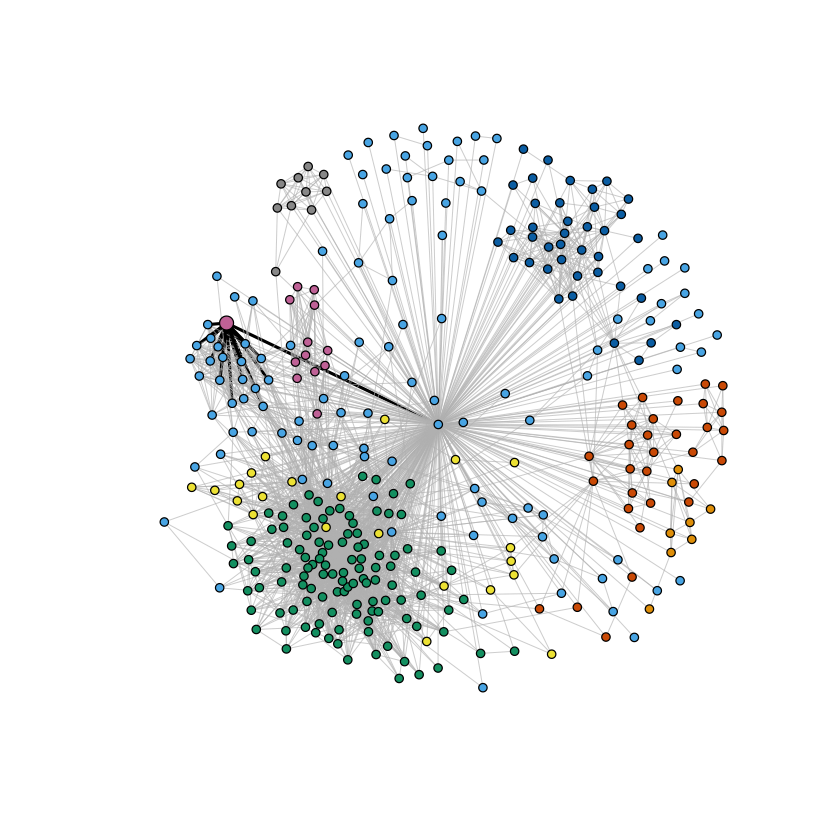

In [191]:
fc1 <- cluster_fast_greedy(g1)
ratio <- disps / embed
ver_color <- fc1$membership + 1
ver_size = rep(3,length(ver_color))
edg_color <- rep("grey", length(E(g1)))
edg_wei = rep(0.5, length(E(g1)))
highl = which(V(g1)$name == V(g1)$name[which(ratio == max(ratio[which(ratio!=Inf)]))])
ver_size[highl] = 5
ver_color[highl] = 7
edg_list = get.edgelist(g1, name = FALSE)
edg_color[which(edg_list[,1] == highl | edg_list[,2] == highl)] = "black";
edg_wei[which(edg_list[,1] == highl | edg_list[,2] == highl)] = "2.5";

plot(g1, vertex.size = ver_size, vertex.label = NA , edge.color =  edg_color, edge.width = edg_wei, vertex.color = ver_color)